In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
import time

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x20d95799ad0>)

In [3]:
train_data = pd.read_table('ratings.txt')

In [4]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
print(train_data.isnull().sum())

id          0
document    8
label       0
dtype: int64


In [6]:
train_data = train_data.dropna(how='any')

In [7]:
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [8]:
# 한글 이외 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\USER\AppData\Local\Temp\ipykernel_4368\4128385180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [9]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [10]:
# 불용어 목록 생성 및 제거

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [05:50<00:00, 571.11it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


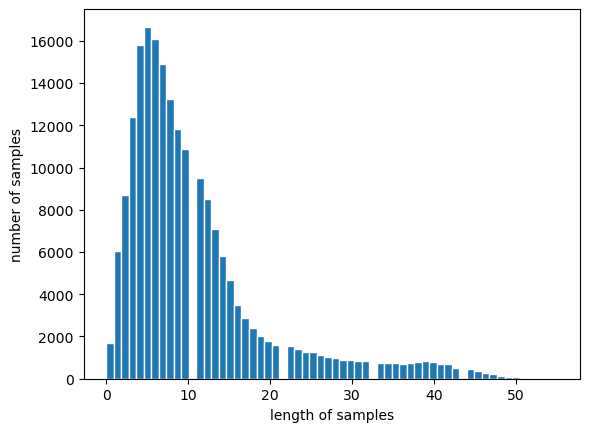

In [22]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=60, edgecolor = 'white', range = [0,55])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
# 벡터 차원 100, 주변단어 범위 5, 최소 빈도 5, 프로세스 수 4, CBOW 방식으로 학습

from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
model.wv.vectors.shape

(16477, 100)

In [27]:
# 성룡 유사어
print(model.wv.most_similar("성룡"))

[('이연걸', 0.8494542837142944), ('견자단', 0.8030697703361511), ('이소룡', 0.7601993083953857), ('제이슨', 0.710422933101654), ('뎀', 0.70420902967453), ('무술', 0.6964723467826843), ('스타', 0.6903480887413025), ('형님', 0.6819943785667419), ('박중훈', 0.6681973934173584), ('아놀드', 0.667843222618103)]


In [28]:
# 봉준호 유사어
print(model.wv.most_similar("봉준호"))

[('오슬로', 0.9048931002616882), ('버호벤', 0.9034063816070557), ('미이케', 0.8960679173469543), ('세지', 0.8944541811943054), ('류승완', 0.8936058282852173), ('정소동', 0.8891512155532837), ('쿠엔틴', 0.8883740901947021), ('데이빗', 0.8873936533927917), ('임상수', 0.886605441570282), ('샤말란', 0.8816859722137451)]
